#  <font color=darkred align = "center">*Masculinity in the Age of \#MeToo* </font>
### What do men think it means to be a man?
<img src="./1.png"  width="400" height= "300" align = "right"/>

##### [Farnaz Ghashami](https://github.com/FarnazGhashami), [Kiana Montazeri](https://github.com/kianamon), Varun Natu, Robert Shipley, Peiqiang Li

## <font color=darkblue>Table of Contents</font>

* [Introduction](#Introduction)<br>
* [Dataset](#data)<br>
* [Pre-Processing](#pre)<br>
* [Missing Data](#missing)<br>
* [Objective](#Objective)<br>
* [Exploratory Analysis](#exp)<br>
* [Data Processing](#process)<br>
* [Conclusion](#con)<br>


## Introduction  <a name="Introduction"></a>

Over the past few years, women all over the world have been startled by the onset of the \#MeToo movement and have been standing on the front row of the global fight against sexual misconduct and the abuse of power.

The conversations on the topic gradually evolved into one that tackled how women are treated not just in the professional environment but also in many social situations. Although most conversations are focused on women's roles, men behind the scenes are leading the critical redefining of masculinity.

\#MeToo movement discusses a problem that is the direct result of male action; since it is not just women who are victims of misconduct, but the frustration that started the movement in the first place is directed at a culture that has encouraged a trend of toxic masculinity without the urge of worrying about the consequences.

In addition to lots of women who are affected by these consequences, these behaviors have left many generations of men to doubt every single action they take or decision they make that might now be considered as misconduct. This is why men's participation in the movement of changing the culture about harassment and assault is absolutely necessary and it is crucial to adjust the social interpretation of what it means to be a man in the wake of \#MeToo movement.

‘’Toxic masculinity is defined by adherence to traditional male gender roles that restrict the kinds of emotions allowable for boys and men to express, including social expectations that men seek to be dominant (the "alpha male") and limit their emotional range primarily to expressions of anger.’’ __Wikipedia. The social pressure dictates that men have to be aggressive or without emotions in order to express dominance and power and these expectations can mix up the actions or decisions that are considered acceptable with what is considered to be misconduct. All these behaviors are excused by saying this is the natural way of how men are supposed to be and misconducts are inevitable and others have to learn to deal with them. Dealing with this problem is the main purpose of \#MeToo movement.

\ #MeToo stories have caused a lot of men to consider their own actions that could have unintentionally made a woman feel uncomfortable. Some behaviors while may have been acceptable before, would be considered sexual assault today. The step forward in solving these issues are redefining the term masculinity. Rather than society’s toxic definition of it, now it can be defined as respect, patience and empathy.



## Dataset <a name="data"></a>

Data was gathered through a nationwide survey of 1,615 adults who identify as men. Respondents were asked to reflect on their ideas of masculinity, workplace culture and intimacy, among other things. The results: A majority of men in the workplace say they haven’t rethought their on-the-job behavior in the wake of #MeToo; a little more than half of men feel it’s at least somewhat important that others see them as masculine; and nearly half of all men say they sometimes or often feel lonely or isolated.

In [1]:
#Libraries in Use
from pprint import pprint
from collections import defaultdict
import re
import csv
import pandas as pd
import IPython.display as ipd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_survey = pd.read_csv("./masculinity-survey.csv")

In [3]:
df_survey.head()

,AMONG ADULT MEN,Unnamed: 1,Adult Men,Age,Unnamed: 4,Unnamed: 5,Race,Unnamed: 7,Children,Unnamed: 9,Sexual Orientation,Unnamed: 11
0,NaN,NaN,NaN,18 - 34,35 - 64,65 and up,White,Non-white,Has children,No children,Straight,Gay/Bisexual
1,"In general, how masculine or ""manly"" do you feel?",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Very masculine,37%,29%,42%,37%,34%,44%,43%,30%,40%,21%
3,NaN,Somewhat masculine,46%,47%,46%,47%,50%,39%,47%,46%,47%,49%
4,NaN,Not very masculine,11%,13%,9%,13%,11%,11%,6%,17%,10%,19%


In [4]:
pprint([str(x)+"\n" for x in df_survey['AMONG ADULT MEN'].unique()])

['nan\n',
 'In general, how masculine or "manly" do you feel?\n',
 'How important is it to you that others see you as masculine?\n',
 'Where have you gotten your ideas about what it means to be a good man? '
 '(Select all that apply.)\n',
 'Do you think that society puts pressure on men in a way that is unhealthy or '
 'bad for them?\n',
 'Ask a friend for professional advice\n',
 'Ask a friend for personal advice\n',
 'Express physical affection to male friends, like hugging, rubbing '
 'shoulders\n',
 'Cry\n',
 'Get in a physical fight with another person\n',
 'Have sexual relations with women, including anything from kissing to sex\n',
 'Have sexual relations with men, including anything from kissing to sex\n',
 'Watch sports of any kind\n',
 'Work out\n',
 'See a therapist\n',
 'Feel lonely or isolated\n',
 'Which of the following do you worry about on a daily or near daily basis? '
 '(Select all that apply.)\n',
 'Which of the following categories best describes your employment st

In [5]:
len(list(df_survey['AMONG ADULT MEN'].unique()))-1

35

Data contains 30 survey questions with 11 distinct columns. We can see from here that the data needs intense cleaning and we should convert the data to a structured format. We will download the raw data from the survey as well. This data is each individual response from the whole survey.

In [6]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv'
df_raw = pd.read_csv(url,index_col=0,parse_dates=[0])

In [7]:
df_raw.head(2)

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120


In [8]:
df_raw.shape

(1615, 97)

In [9]:
df_raw.columns

Index(['StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001', 'q0004_0002',
       'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006', 'q0005',
       'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005',
       'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009', 'q0007_0010',
       'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003', 'q0008_0004',
       'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008', 'q0008_0009',
       'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009', 'q0010_0001',
       'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005', 'q0010_0006',
       'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002', 'q0011_0003',
       'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002', 'q0012_0003',
       'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007', 'q0013',
       'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001',

It seems like that this data needs less cleaning and might be more useful for us to use.

## Pre-Processing (Data Cleaning)  <a name="pre"></a>

In [10]:
df_raw = df_raw.replace(to_replace ="Not selected", value = 0)

In [11]:
df_raw.head(2)

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,0,0,0,Pop culture,0,0,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),0,0,0,0,0,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120


In [12]:
listofColumns = [e for e in list(df_raw.columns) if e not in ['race2', 'kids']]    

In [13]:
for col in listofColumns:
    unq_vals = list(df_raw[col].unique())
    if len(unq_vals) == 2:
        if unq_vals[0] == 0:
            df_raw[col] = df_raw[col].replace(unq_vals[1], 1)
        elif unq_vals[1] == 0:
            df_raw[col] = df_raw[col].replace(unq_vals[0], 1)       

In [14]:
df_raw.head(2)

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,0,0,0,1,0,0,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,1,0,0,0,0,0,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120


Up to this point, we cleaned the data related to the questions on the survey. Now we should clean the information about the person such as ethnicity, having kids, and etc.

In [15]:
df_raw['race2'].unique()

array(['Non-white', 'White'], dtype=object)

In [16]:
df_raw['racethn4'].unique()

array(['Hispanic', 'White', 'Other', 'Black'], dtype=object)

In [17]:
df_raw['educ3'].unique()

array(['College or more', 'Some college', 'High school or less'],
      dtype=object)

In [18]:
df_raw['educ4'].unique()

array(['College or more', 'Some college', 'Post graduate degree',
       'High school or less'], dtype=object)

In [19]:
df_raw['age3'].unique()

array(['35 - 64', '65 and up', '18 - 34'], dtype=object)

In [20]:
df_raw['kids'].unique()

array(['No children', 'Has children', nan], dtype=object)

In [21]:
df_raw['orientation'].unique()

array(['Gay/Bisexual', 'Straight', 'No answer', 'Other'], dtype=object)

let's drop the not-needed columns:

In [22]:
df_raw.drop('race2', axis=1, inplace=True)

In [23]:
df_raw.drop('educ3', axis=1, inplace=True)

In [24]:
df_raw.drop('StartDate', axis=1, inplace=True)

In [25]:
df_raw.drop('EndDate', axis=1, inplace=True)

In [26]:
df_raw['kids'] = pd.Series(np.where(df_raw.kids.values == 'Has children', 1, 0),
          df_raw.index)

labels are stored in the column `q0022`

In [27]:
print([x for x in df_raw['q0022']][:10])

['No', 'No', 'No', 'No answer', 'No', 'No', 'No', 'Yes', 'No', 'No']


In [28]:
df_raw['q0022'] = pd.Series(np.where(df_raw.q0022.values == 'No', 0, 1),
          df_raw.index)

In [29]:
df_raw.head(2)

,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,...,q0030,q0034,q0035,q0036,racethn4,educ4,age3,kids,orientation,weight
1,Somewhat masculine,Somewhat important,0,0,0,1,0,0,Yes,Often,...,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Hispanic,College or more,35 - 64,0,Gay/Bisexual,1.714026
2,Somewhat masculine,Somewhat important,1,0,0,0,0,0,Yes,Rarely,...,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,Some college,65 and up,1,Straight,1.247120


In [30]:
print([x for x in df_raw['q0022']][:10])

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


I assumed if they did not answer, they have changed their behavior.

## Missing Data <a name="missing"></a>

Here, we check for missing data points and try to fill them in.

In [31]:
print([x for x in df_raw.columns])
print([x for x in df_raw.isnull().sum(axis = 0)])

['q0001', 'q0002', 'q0004_0001', 'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006', 'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009', 'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003', 'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008', 'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009', 'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005', 'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002', 'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002', 'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007', 'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002', 'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007', 'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 'q0020_0005', 'q0020_0006', 'q0021_0001', 'q0021_0002', 'q0021_0003', 'q0021_0

In [32]:
df_cleaned = df_raw.fillna(0)

In [33]:
print([x for x in df_cleaned.isnull().sum(axis = 0)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


I will write the cleaned dataset in a new csv file for future use:

In [34]:
df_cleaned.to_csv("./df_cleaned.csv", sep=',')

In [35]:
#load the data:
df_raw = pd.read_csv("./df_cleaned.csv")

## Objective  <a name="Objective"></a>

In this project we will use the results of the survey to construct a prediction model on the impacts of \#MeToo movement on people's behavior in both social and professional environments. As a result we can extract what type of personalities are more affected by the social impacts of the movement and eventually what would be the most effective long term plan for training children and younger generations and presenting them with role models of what they should aspire to become. 

In summary, we will explore this data set to:

1. <font color=green>Predict if the movement changed the behavior of people.</font><br>
2. <font color=blue>What types of people are more subjected to these required changes?</font><br>
3. <font color=red>What are the most important personality features that are playing a role in the culture change because of MeToo?</font><br>


## Exploratory Analysis  <a name="exp"></a>

In [36]:
import seaborn as sns

In [37]:
sns.set(rc={'figure.figsize':(20,10)})

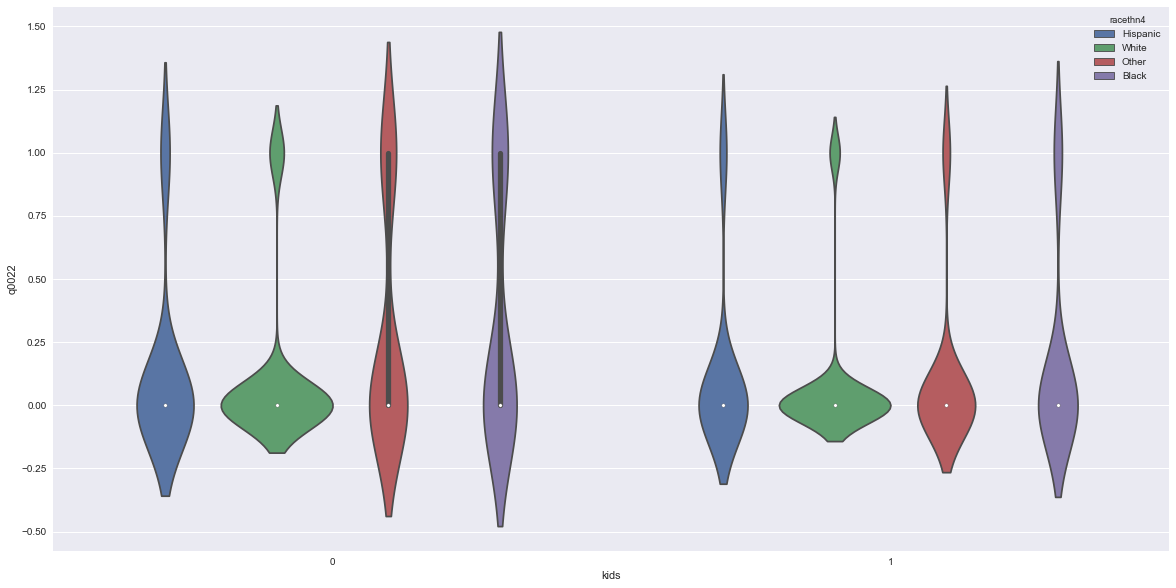

In [38]:
# plotting the violinplot
sns.violinplot(x="kids",y="q0022", hue="racethn4", data=df_raw);
plt.show()

<font color=blue>It seems like that having or not having kids in hispanic or white people is not enforcing any behaviaral changes in men of these races. Although, we can see that black men without kids tend to change their social behavior in the wake of the movement.</font>

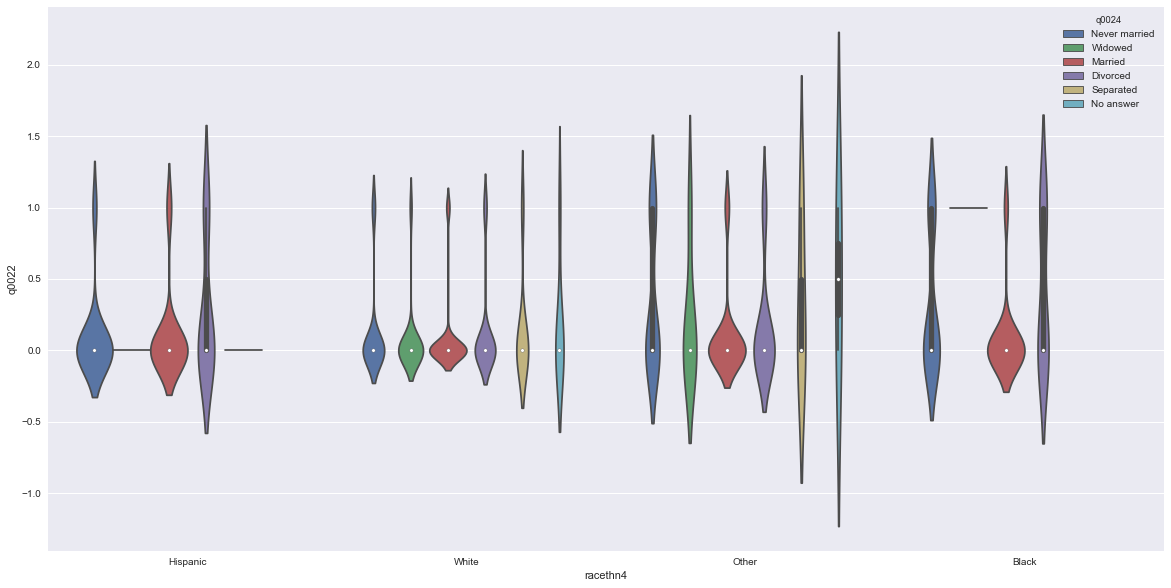

In [39]:
# plotting the violinplot
sns.violinplot(x="racethn4",y="q0022", hue="q0024", data=df_raw);
plt.show()

<font color=blue>As we saw previously race is playing a very important role on the effects of #metoo on culture and behavior changes. However, the severity of these changes are more in divorced or never-married men.</font>

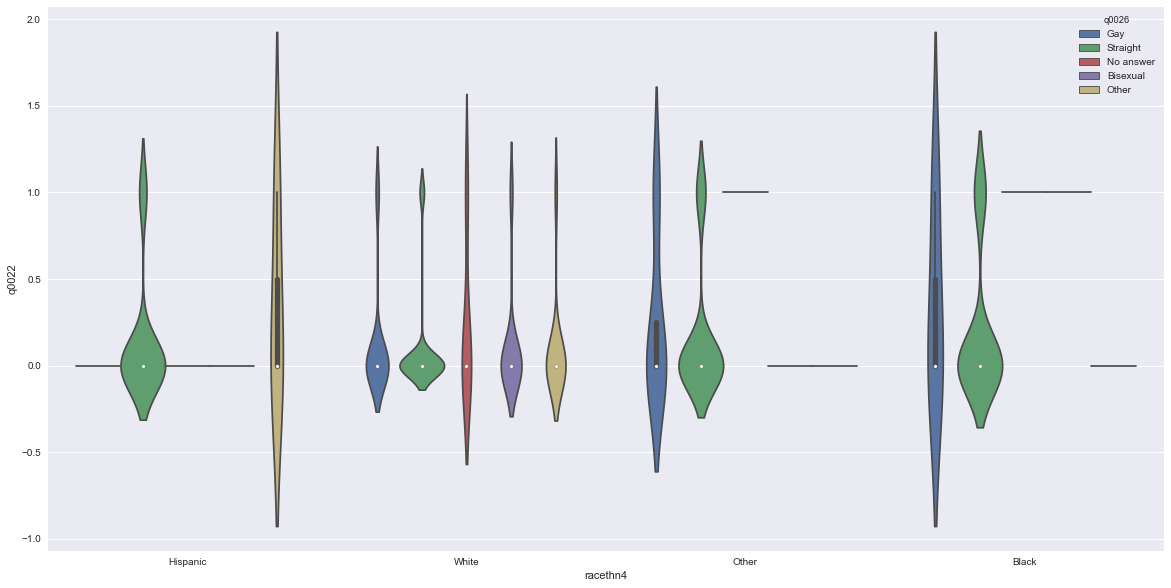

In [40]:
# plotting the violinplot
sns.violinplot(x="racethn4",y="q0022", hue="q0026", data=df_raw);
plt.show()

<font color=blue>Over all races, it seems like like gay or bisexual people are most likely to change their behavior. This is an interesting observation on why this is the case. It may be a social discrimination against their community to feel more presure regarding how they interact with others.</font>

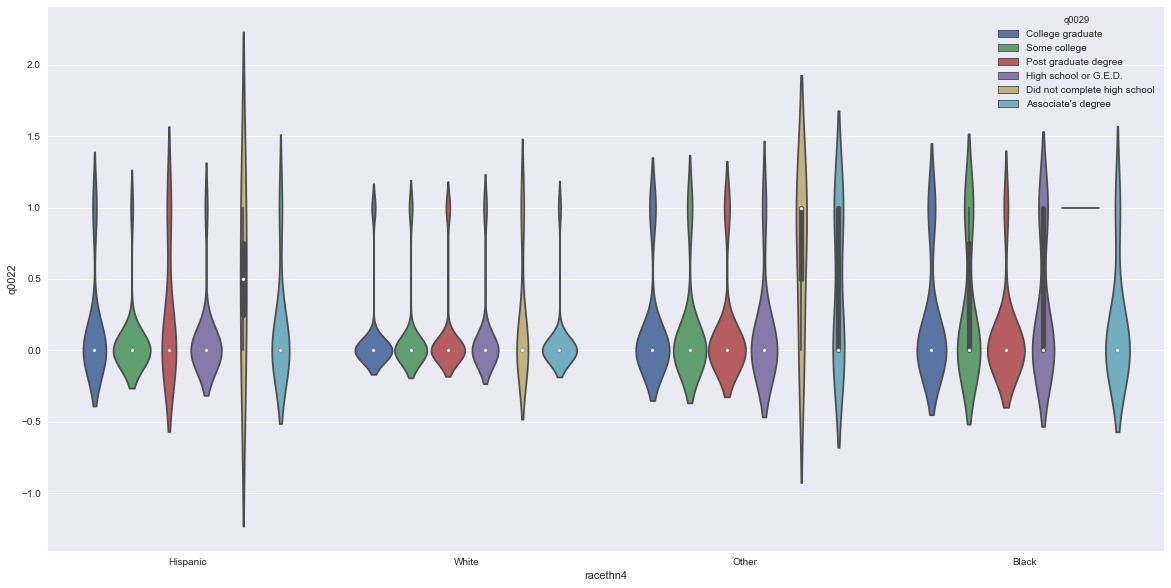

In [41]:
# plotting the violinplot
sns.violinplot(x="racethn4",y="q0022", hue="q0029", data=df_raw);
plt.show()

<font color=blue>Over all races, people with no high school education are more prone to critisism about their behaviour. People with more education degrees are mostly continuing with previous habits.</font>

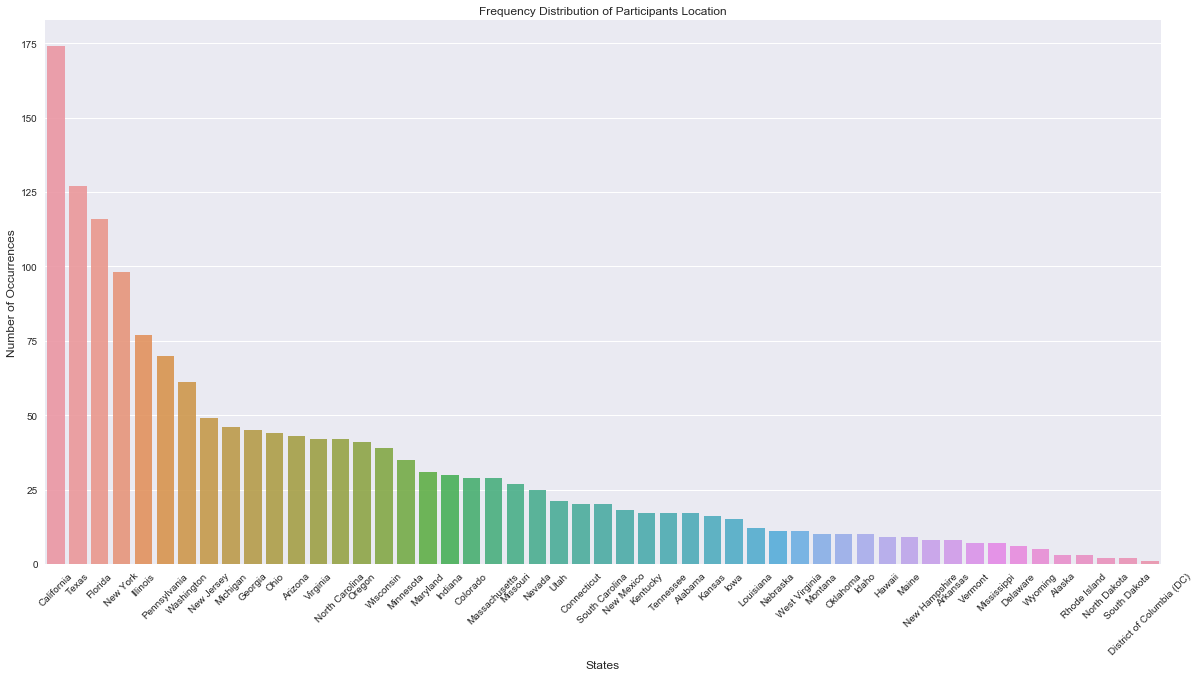

In [42]:
_count = df_raw['q0030'].value_counts()
sns.set(style="darkgrid")
sns.barplot(_count.index, _count.values, alpha=0.9)
plt.title('Frequency Distribution of Participants Location')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.xticks(rotation=45)
plt.show()

One thing that we should keep in mind is that the distribution of participants are not uniform. For instance geographically, they are mostly concentrated in California or Texas due to more population of those areas. 

#### Correlation Plot:

/Users/Kianamon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Kianamon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


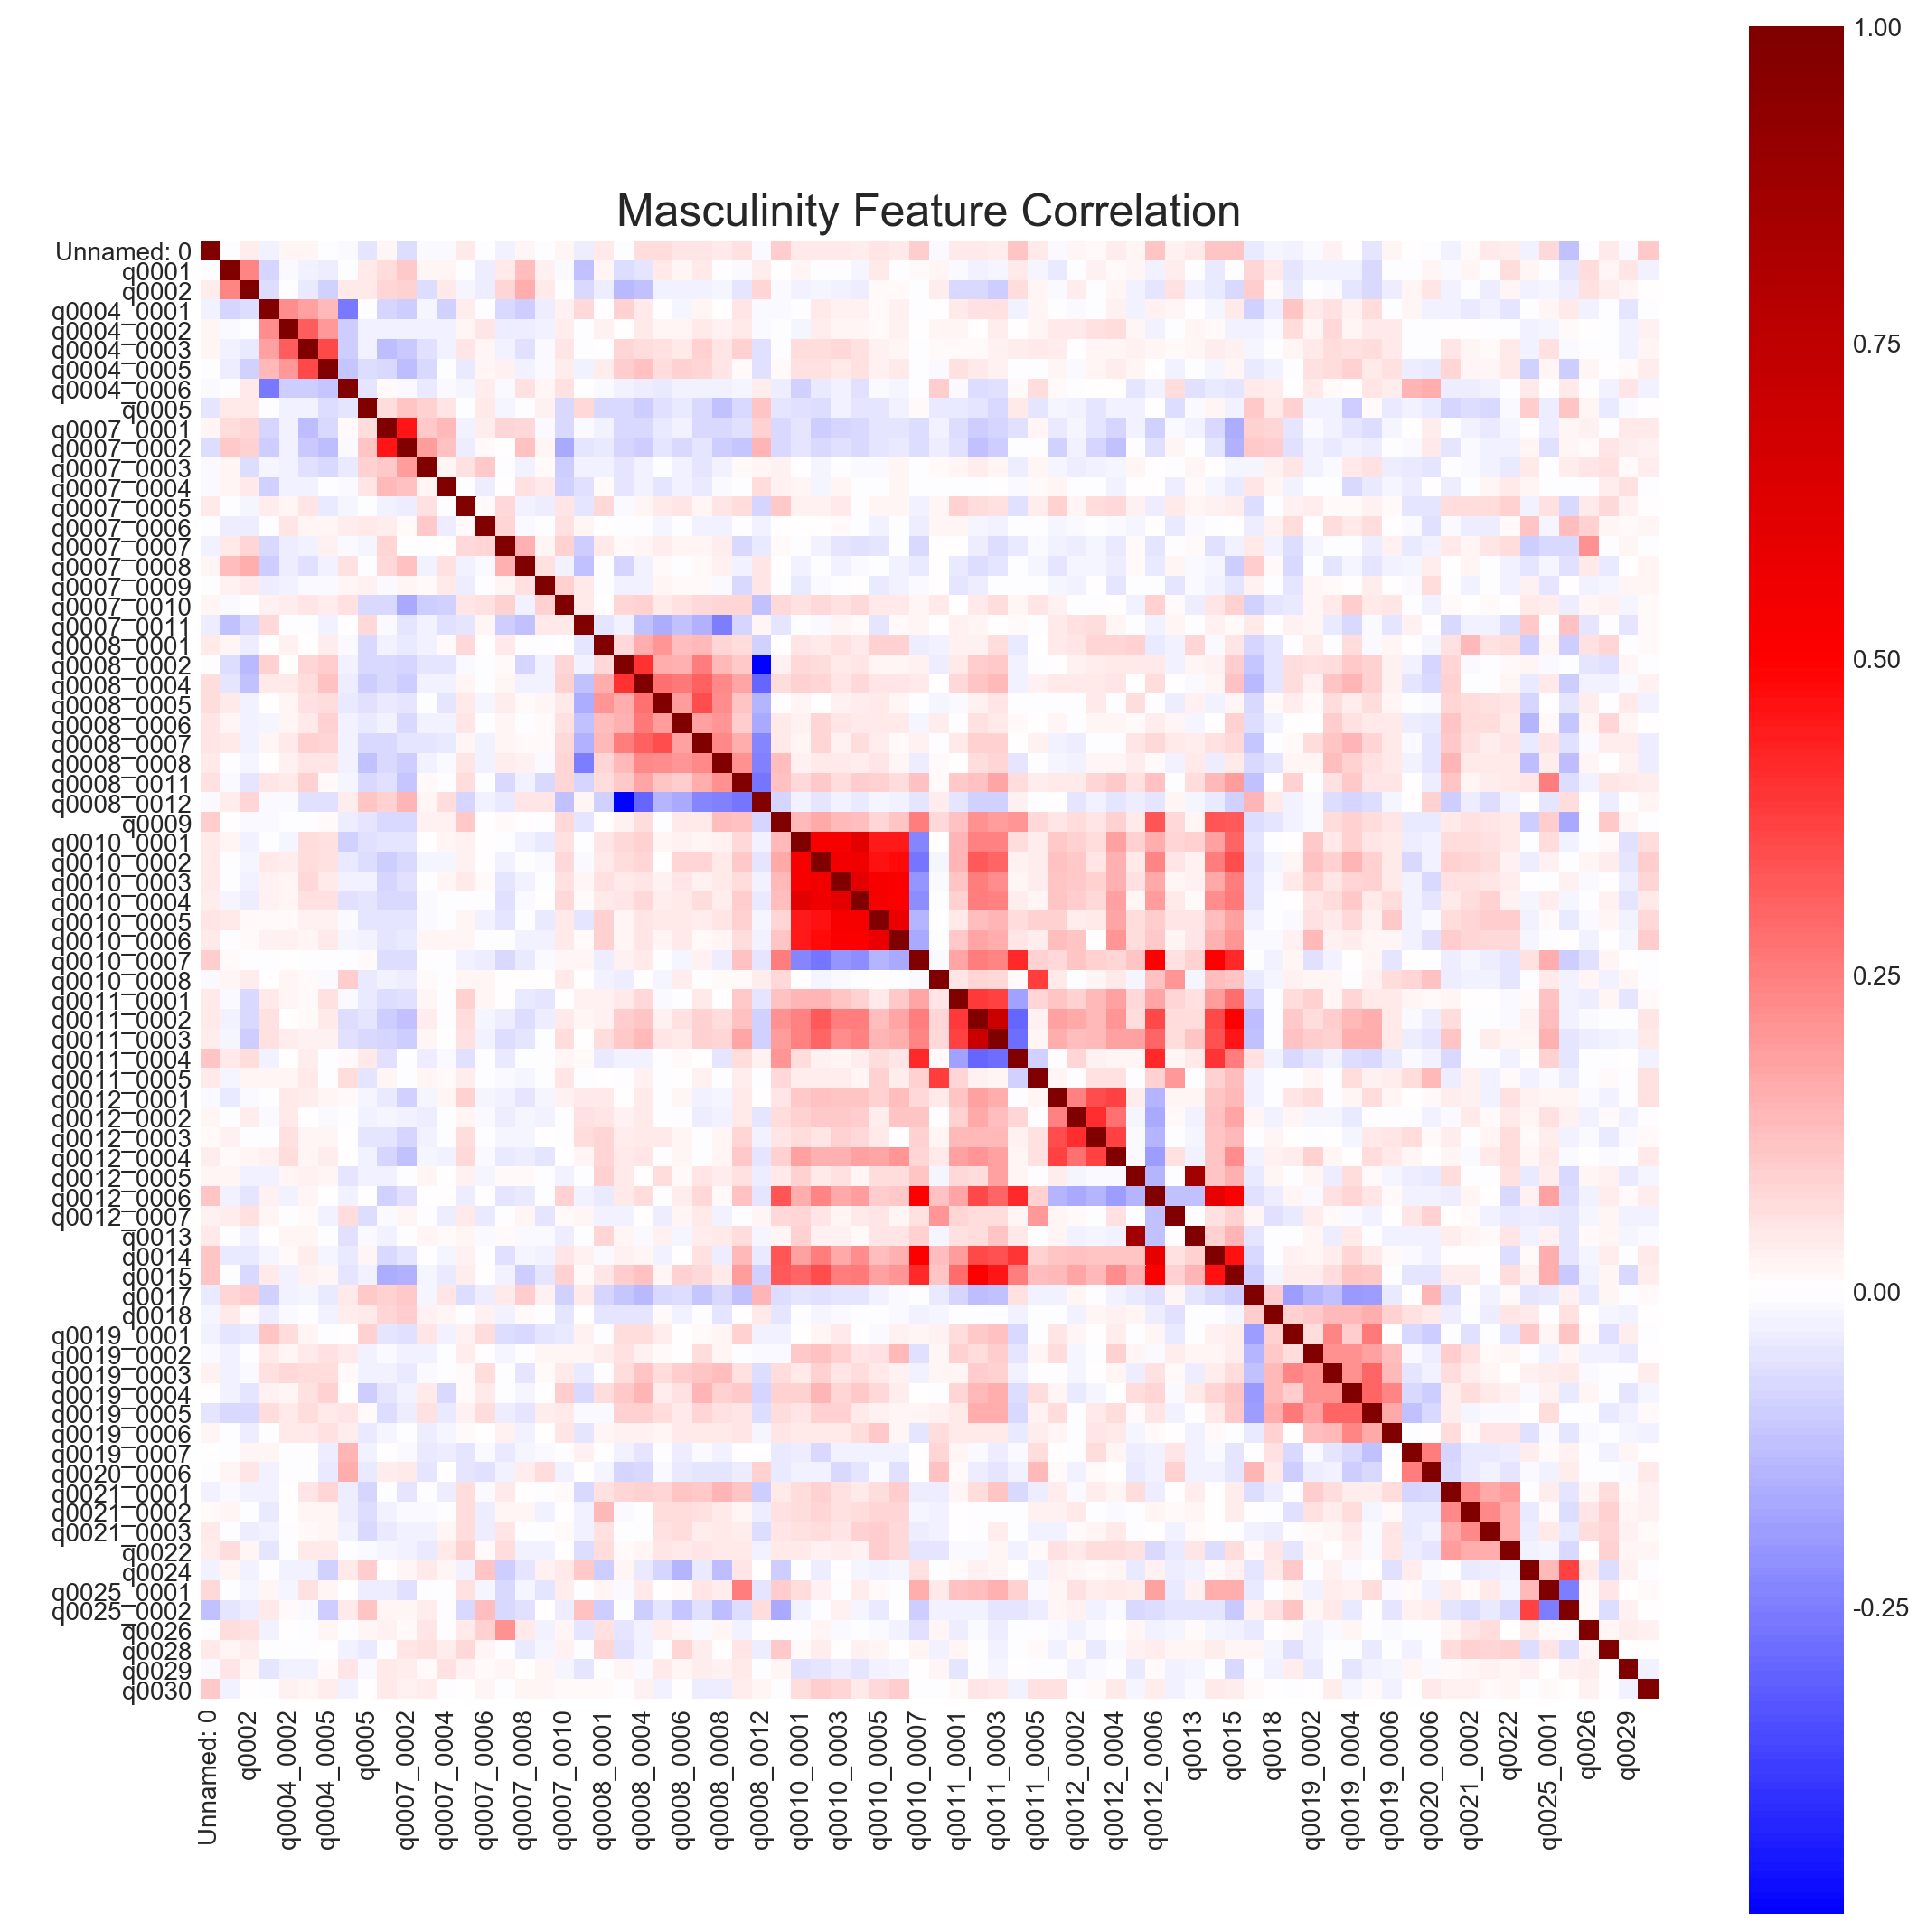

In [43]:
# Load required packages 

from scipy.stats import pearsonr
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
matplotlib.rcdefaults()
p = matplotlib.rcParams
# Configure chart font
p["font.family"] = "sans-serif"
p["font.sans-serif"] = ["SimHei", "Tahoma"]
p["font.size"] = 10
p["axes.unicode_minus"] = False
p['axes.linewidth']=2.0
# Configure chart size
p["figure.figsize"] = (14.15, 20) # A4 paper size, vertical page
# p["figure.figsize"] = (20, 14.15) # A4 paper size, horizontal page
# Configure chart resolution
p["figure.dpi"] = 200
# Configure the size and position of the drawing area. 
#The following values are based on the ratio of the width and height of the icon.
p["figure.subplot.left"] = 0.1   # Left margin
p["figure.subplot.right"] = 0.94   # Right margin
p["figure.subplot.bottom"] = 0.05  # Bottom margin 
p["figure.subplot.top"] = 0.92   # Top margin


p["figure.subplot.wspace"] = 0.4
p["figure.subplot.hspace"] = 0.4


dt=df_raw.dropna(axis=1,thresh=800) 

dt=dt.dropna(axis=0,thresh=30) 
df=dt.copy()

for i in dt.columns:
    class1=df[i]
    class2=class1
    t=0
    for j in class1.unique():
        class2[class1==j]=t
        t+=1
    df[i]=class2
# Generate correlation coefficient matrix, calculate with pearson, write to file
o=open('corr.txt','w')
o.write('\t'.join([' ']+df.columns.tolist())+'\n')
for i in df.columns:
    rho=[i]
    for j in df.columns:
        rho1=[str(pearsonr(df[i],df[j])[0])]
        rho=rho+rho1
    o.write('\t'.join(rho)+'\n')
o.close()

# Read the correlation file, remove the entire row and column are NA values
corr_data=pd.read_csv('corr.txt',sep='\t',index_col=0)
corr_data=corr_data.dropna(how='all')
corr_data=corr_data.dropna(axis=1,how='all')
# Draw with heatmap from python3's seaborn package
sns.set_style("darkgrid")
# Set graphic size
plt.subplots(figsize=(12, 12)) 
# Remove some attributes that are not related to personality (age, address, etc.)
da=corr_data.iloc[:-9,:-9] 
# Paint tone color
sns.heatmap(da, annot=False,square=True,center=0,cmap='seismic') 
# Set title
plt.title('Masculinity Feature Correlation',size=18) 
# save Picture
plt.savefig('Masculinity_Feature_Correlation.png',dpi=600) 

<font color=red>The most important characteristics attributes in the personality of people who changed their behavior in the wake of #metoo seems to be: The habits of pushing boundaries in sexual encounters and going too far, assuming consent instead of clearly asking, and the obligation feeling to pay for the cost of the date.</font><br>

## Data Processing  <a name="process"></a>

In this section we go over each problem statement from objective and try to answer them based on this data.

In [44]:
labels = df_raw['q0022']
df_raw.drop('q0022', axis=1, inplace=True)

In [45]:
df_raw.head(2)

,Unnamed: 0,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,...,q0030,q0034,q0035,q0036,racethn4,educ4,age3,kids,orientation,weight
0,1,Somewhat masculine,Somewhat important,0,0,0,1,0,0,Yes,...,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Hispanic,College or more,35 - 64,0,Gay/Bisexual,1.714026
1,2,Somewhat masculine,Somewhat important,1,0,0,0,0,0,Yes,...,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,Some college,65 and up,1,Straight,1.247120


In [46]:
cols = df_raw.columns
num_cols = df_raw._get_numeric_data().columns
categorical_features = list(set(cols) - set(num_cols))

In [47]:
print(categorical_features)

['racethn4', 'q0011_0004', 'q0011_0001', 'q0005', 'q0007_0003', 'q0034', 'q0012_0006', 'q0010_0004', 'q0019_0003', 'q0009', 'q0026', 'q0019_0007', 'q0024', 'q0010_0007', 'q0011_0003', 'q0012_0005', 'q0010_0008', 'q0007_0006', 'q0007_0002', 'q0007_0008', 'q0012_0001', 'q0019_0002', 'q0015', 'q0035', 'orientation', 'q0007_0001', 'q0036', 'q0018', 'q0010_0006', 'q0014', 'q0019_0001', 'q0007_0004', 'q0010_0001', 'q0012_0004', 'q0011_0005', 'q0002', 'q0019_0005', 'q0007_0010', 'q0010_0003', 'q0012_0003', 'q0007_0007', 'q0007_0011', 'q0013', 'q0012_0002', 'q0017', 'q0019_0004', 'q0010_0005', 'age3', 'q0007_0009', 'q0007_0005', 'q0029', 'q0030', 'q0012_0007', 'q0011_0002', 'q0010_0002', 'q0019_0006', 'q0001', 'q0028', 'educ4']


In [48]:
len(categorical_features)

59

In [49]:
print(labels[:10])

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: q0022, dtype: int64


#### One Hot Encoding

Since most of the variables in this dataset are categorical, we have to convert them into numercal values for processing. Numerical ordinal encoding is the easiest option but it biases the model unfairly. That is why we will perform one hot encoding to resolve this issue. By this method, we are creating multiple dummy variables with binary values in a sparse matrix.

In [50]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_raw[categorical_features])
# Drop column B as it is now encoded
df_raw = df_raw.drop(categorical_features,axis = 1)
# Join the encoded df
df_raw = df_raw.join(one_hot)
df_raw['Labels'] = labels

In [51]:
df_raw.head()

,Unnamed: 0,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0008_0001,q0008_0002,q0008_0003,...,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White,educ4_College or more,educ4_High school or less,educ4_Post graduate degree,educ4_Some college,Labels
0,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,5,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [52]:
df_raw.shape

(1615, 317)

#### Split to train and test:

In [53]:
XX = df_raw.iloc[:, :-1]

In [54]:
XX.head(2)

,Unnamed: 0,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0008_0001,q0008_0002,q0008_0003,...,q0001_Very masculine,q0028_Asian,q0028_Black,q0028_Hispanic,q0028_Other,q0028_White,educ4_College or more,educ4_High school or less,educ4_Post graduate degree,educ4_Some college
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


#### Creating the Labels:

In [55]:
yy = df_raw.iloc[:, -1]

In [56]:
yy.head(2)

0    0
1    0
Name: Labels, dtype: int64

#### Training the Model

Since we have a binary output, we have decided to use logistic regression to develop the prediction model. We have divided the dataset to 20-80 test and train sets.

We are using `lbfgs` solver for the model which is limited memory bfgs. In numerical optimization, the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm is an iterative method for solving unconstrained nonlinear optimization problems using a limited computer memory. The BFGS method belongs to quasi-Newton methods, a class of hill-climbing optimization techniques that seek a stationary point of a (preferably twice continuously differentiable) function. For such problems, a necessary condition for optimality is that the gradient be zero. Newton's method and the BFGS methods are not guaranteed to converge unless the function has a quadratic Taylor expansion near an optimum. However, BFGS can have acceptable performance even for non-smooth optimization instances.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

In [59]:
from sklearn.metrics import log_loss
print(log_loss(y_test,np.ones(len(y_test))*y_train.mean()))

0.3300206660444059


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
def train_model(train_dat, train_lbl):
    LogReg = LogisticRegression(solver='lbfgs', max_iter = 1000, multi_class='ovr')
    # Create an instance of Logistic Regression Classifier and fit the data.
    clf = LogReg.fit(train_dat, train_lbl)
    return clf

In [64]:
clf = train_model(x_train, y_train)

/Users/Kianamon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [65]:
test_labels_predicted = clf.predict(x_test)

In [66]:
score = accuracy_score(test_labels_predicted, y_test)

In [67]:
print(score)

0.8761609907120743


** The accuracy of the model is 87.16 %. **

## Conclusion  <a name="con"></a>

Herein, using this dataset we were able to answer the question we raised in the objective.

1. <font color=green>Predict if the movement changed the behavior of people.</font><br>
We have developed a prediction model based on this dataset using logistic regression. The accuracy of our model is 87.16 %.<br>
2. <font color=blue>What types of people are more subjected to these required changes?</font><br>
Black or hispanic people, people with lower education levels, and divorced or never-married people.<br>
3. <font color=red>What are the most important personality features that are playing a role in the culture change because of MeToo?</font><br>
Pushing boundries, assuming consent, pressure on who pays for the date.<br>